# Tree Models

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

### Dataframe

In [2]:
df = pd.read_csv("data/final_data.csv")
df.dropna(inplace=True)
df

,Tm,Year,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,...,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB,WinLoss
0,BOS,1984,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,...,1.560378,1.631836,0.683,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129,0.756
1,NJN,1984,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,...,0.168776,0.223381,0.598,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690,0.549
2,NYK,1984,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,...,-0.661303,-0.552811,0.537,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871,0.573
3,PHI,1984,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,...,1.389480,1.475055,0.793,1.597761,1.650775,1.244913,0.401919,-1.004836,-0.809547,0.634
4,WSB,1984,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,...,0.217604,0.272215,0.512,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759,0.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,MEM,2023,0.029700,0.788586,1.130905,0.968684,-1.070200,-0.527428,0.347908,-0.031597,...,0.204566,0.225057,0.683,1.172994,1.149034,0.038747,-1.149863,0.795401,-0.581626,0.622
1127,OKC,2023,-1.345019,-1.285102,-0.719667,-1.695773,-0.637248,-1.811068,1.053207,-2.128521,...,-2.144903,-2.131412,0.293,-1.665226,-1.690033,-0.007749,-0.308500,0.690877,-0.610994,0.488
1128,BRK,2023,0.362323,-0.175241,-1.045230,-0.549918,0.205909,0.337065,-0.760419,0.198202,...,0.913457,0.892021,0.537,0.165220,0.175579,-0.193734,0.532864,-1.076320,-0.404584,0.549
1129,NOP,2023,0.015879,-0.175241,0.137079,-0.190976,0.612445,0.468048,0.395323,0.471090,...,-0.058737,-0.042150,0.439,-0.204983,-0.179572,0.038747,-1.149863,-0.013805,0.039575,0.512


In [3]:
first_df = df[(df.Year <= 2013)]
y_train = np.array(first_df.WinLoss)
X_train = first_df.drop(["WinLoss", "Year", "Tm"], axis = 1)
second_df = df[(df.Year >= 2014)]
y_test = np.array(second_df.WinLoss)
X_test = second_df.drop(["WinLoss", "Year", "Tm"], axis = 1)

In [4]:
X_train

,PTS_1,VORP_1,PER_1,WS_1,PTS_2,VORP_2,PER_2,WS_2,PTS_3,VORP_3,...,WinLoss_2,NRtg_2,SRS_2,WinLoss_1,NRtg_1,SRS_1,Rest,B2B,distLB,distUB
0,0.691282,1.306881,0.415070,1.050208,0.931111,1.223837,0.082140,0.793457,0.665685,-0.017425,...,0.768,1.560378,1.631836,0.683,1.120777,1.170642,1.244913,-0.368426,-0.359567,0.043129
1,-0.704902,-0.408742,-1.024888,-0.549483,-0.370323,-0.862499,-1.121805,-1.075314,-0.155329,-0.800771,...,0.537,0.168776,0.223381,0.598,0.581578,0.607197,1.244913,-0.881990,-0.736498,-0.606690
2,-0.985729,-0.562171,-0.828808,-0.560477,0.295417,-0.436011,-0.828391,-0.473870,0.386474,-0.491076,...,0.402,-0.661303,-0.552811,0.537,0.519363,0.565542,-0.544649,0.401919,-0.657416,-0.641871
3,0.803246,1.641637,0.669361,1.462499,1.852632,2.952845,1.327730,2.142409,1.046610,1.166702,...,0.707,1.389480,1.475055,0.793,1.597761,1.650775,1.244913,0.401919,-1.004836,-0.809547
4,0.400665,2.060082,2.424884,2.451998,-0.118101,0.232539,0.409628,0.518512,-0.864992,1.130267,...,0.524,0.217604,0.272215,0.512,-0.019837,0.043753,-0.544649,0.145138,-1.147874,-0.891759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,-1.333234,-1.228834,-1.462172,-1.645653,-1.125533,-1.017592,-1.402107,-1.163579,-0.974414,0.598495,...,0.280,-1.567634,-1.604512,0.303,-0.997629,-1.082253,0.917020,0.729542,-0.446751,-0.770625
826,0.604994,1.388800,1.535243,1.585305,0.330826,0.374367,-0.456866,0.058543,0.356083,-0.390614,...,0.561,0.486312,0.560480,0.621,0.415679,0.511959,0.059640,-0.422367,0.543168,-0.459561
827,-1.122397,-0.886048,0.304961,-0.796134,-1.727405,-1.093864,-0.902633,-1.268795,-1.495970,-1.413253,...,0.561,0.189867,0.281339,0.318,-0.789789,-0.654743,0.137583,-0.038397,0.117796,-0.072959
828,-1.618147,-2.537651,-2.148147,-2.536952,-1.538403,-1.551495,0.649495,-1.139298,-1.442750,-1.463546,...,0.415,-0.847694,-0.896768,0.106,-2.888967,-2.939710,-1.327757,1.113512,-0.433073,-0.841319


## XGBoost

In [16]:
tscv = TimeSeriesSplit(n_splits=4, test_size=188, gap = 0)

num_estimators= [i for i in range(20, 121, 20)]
max_depth = [3, 4, 5, 6]
alpha = [0.5, 0.7, 1, 1.2, 1.5]
lam = [0.5, 0.7, 1, 1.2, 1.5]
col_sampletree = [0.7, 0.8, 0.9, 1]
gamma = [0, 0.1, 0.2]

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                for cst in col_sampletree:
                    for gam in gamma:
                        res = [num_esti, md, a, l, cst, gam]
                        rmse = []
                        ratio = 1
                        for train_index, test_index in tscv.split(X_train):
                            cv_train, cv_val = X_train.iloc[train_index], X_train.iloc[test_index]
                            cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                            model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l,
                                                colsample_bytree = cst, gamma = gam, eta = 0.3)
                            model.fit(cv_train, cv_y_train) 
                            rmse.append(ratio*np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                            ratio +=1
                        res.append(np.sum(rmse)/10)
                        score.append(res)

In [5]:
def winloss_win(arr):
    return 82*np.array(arr)

num_estimators    40.000000
max_depth          5.000000
alpha              0.500000
lambda             1.500000
col_sampletree     0.700000
gamma              0.000000
rmse               0.128528
Name: 1848, dtype: float64


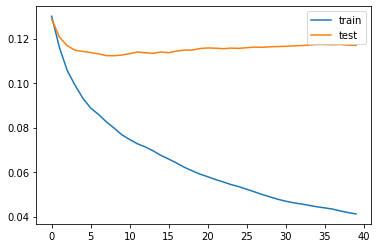

R2 score of the train set : 0.9017211682271217
R2 score of the train set : -0.03949246226593828
MAE score of the train set : 2.588935250947583
MAE score of the test set : 7.6199559540985335


In [18]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "col_sampletree", "gamma", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

evalset = [(X_train, y_train), (X_test,y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), 
                     reg_alpha = best_params[2], reg_lambda = best_params[3],
                     colsample_bytree = best_params[4], gamma = best_params[5], eta = 0.3)

model.fit(X_train, y_train, eval_set = evalset, verbose = 0)
results = model.evals_result()
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the train set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

### Pour ne pas à devoir ReRun le Grid Search

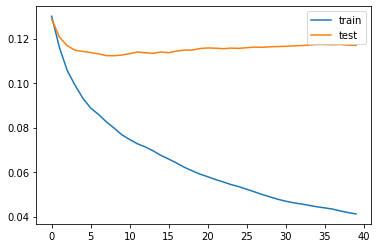

R2 score of the train set : 0.9017211682271217
R2 score of the train set : -0.03949246226593828
MAE score of the train set : 2.588935250947583
MAE score of the test set : 7.6199559540985335


In [6]:
evalset = [(X_train, y_train), (X_test,y_test)]
model = XGBRegressor(n_estimators = 40, max_depth = 5, 
                     reg_alpha = 0.5, reg_lambda = 1.5,
                     colsample_bytree = 0.7, gamma = 0, eta = 0.3)

model.fit(X_train, y_train, eval_set = evalset, verbose = 0)
results = model.evals_result()
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the train set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

### TO CSV

In [10]:
pred_df = df[(df.Year >= 2014)]
pred_df = pred_df[["Tm", "Year"]]
pred_df["Pred"] = winloss_win(model.predict(X_test))
pred_df["Real"] = winloss_win(y_test)
pred_df["Error"] = pred_df.Real - pred_df.Pred
pred_df[(pred_df.Year == 2023)]

,Tm,Year,Pred,Real,Error
1062,BOS,2023,49.015827,56.990,7.974173
1063,NYK,2023,37.348888,46.986,9.637112
1064,ATL,2023,51.024395,41.000,-10.024395
1065,CLE,2023,44.195408,51.004,6.808592
1066,DET,2023,26.772184,16.974,-9.798184
1067,HOU,2023,26.080721,21.976,-4.104721
1068,SAS,2023,32.673000,21.976,-10.697000
1069,CHI,2023,42.150196,40.016,-2.134196
1070,DEN,2023,50.201115,52.972,2.770885
1071,IND,2023,31.924980,35.014,3.089020


In [11]:
pred_df.to_csv("data/pred_test_XGB.csv")

## RF

In [19]:
tscv = TimeSeriesSplit(n_splits=4, test_size=188, gap = 0)

num_estimators= [i for i in range(20, 121, 20)]
min_samples_split = [2, 3, 5, 7]
min_samples_leaf = [1, 3, 5]
max_features = ["sqrt", "log2", 1]

score = []
for num_esti in num_estimators:
    for mss in min_samples_split:
        for msl in min_samples_leaf:
            for mf in max_features:
                res = [num_esti, mss, msl, mf]
                rmse = []
                ratio = 1
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = X_train.iloc[train_index], X_train.iloc[test_index]
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    model = RandomForestRegressor(n_estimators = num_esti, min_samples_split = mss, 
                                                  min_samples_leaf = msl, max_features = mf)
                    model.fit(cv_train, cv_y_train) 
                    rmse.append(ratio*np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                    ratio +=1
                res.append(np.sum(rmse)/10)
                score.append(res)

In [21]:
score = pd.DataFrame(score, columns = ["num_estimators", "min_samples_split", "min_samples_leaf", "max_features", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

model = RandomForestRegressor(n_estimators = int(best_params[0]), min_samples_split = int(best_params[1]), 
                     min_samples_leaf = int(best_params[2]), max_features = int(best_params[3]))

model.fit(X_train, y_train)

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the train set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

num_estimators             20
min_samples_split           5
min_samples_leaf            5
max_features                1
rmse                 0.131192
Name: 26, dtype: object
R2 score of the train set : 0.029934159092685042
R2 score of the train set : -1.0102497588028614
MAE score of the train set : 5.998333225133172
MAE score of the test set : 7.701661440997459


### Pour éviter de ReRUn le Grid Search

In [12]:
model = RandomForestRegressor(n_estimators = 20, min_samples_split = 5, 
                     min_samples_leaf = 5, max_features = 1)

model.fit(X_train, y_train)

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the train set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

R2 score of the train set : 0.14059373736309788
R2 score of the train set : -0.8430170971724091
MAE score of the train set : 5.806346852720734
MAE score of the test set : 7.90661101350718


### TO CSV

In [13]:
pred_df = df[(df.Year >= 2014)]
pred_df = pred_df[["Tm", "Year"]]
pred_df["Pred"] = winloss_win(model.predict(X_test))
pred_df["Real"] = winloss_win(y_test)
pred_df["Error"] = pred_df.Real - pred_df.Pred
pred_df[(pred_df.Year == 2023)]

,Tm,Year,Pred,Real,Error
1062,BOS,2023,49.974462,56.990,7.015538
1063,NYK,2023,38.648295,46.986,8.337705
1064,ATL,2023,45.512265,41.000,-4.512265
1065,CLE,2023,40.201754,51.004,10.802246
1066,DET,2023,30.874789,16.974,-13.900789
1067,HOU,2023,31.521358,21.976,-9.545358
1068,SAS,2023,36.610308,21.976,-14.634308
1069,CHI,2023,44.632806,40.016,-4.616806
1070,DEN,2023,47.425151,52.972,5.546849
1071,IND,2023,32.016593,35.014,2.997407


In [14]:
pred_df.to_csv("data/pred_test_RF.csv")

## CART

In [6]:
# Train-test split

df_no_nan = df.dropna()
first_df = df_no_nan[(df_no_nan.Year <= 2013)]
y_train = np.array(first_df.WinLoss)
X_train = first_df.drop(["WinLoss", "Year", "Tm"], axis = 1)
second_df = df_no_nan[(df_no_nan.Year >= 2014)]
y_test = np.array(second_df.WinLoss)
X_test = second_df.drop(["WinLoss", "Year", "Tm"], axis = 1)

In [7]:
# Grid Search

tscv = TimeSeriesSplit(n_splits=4, test_size=100, gap = 0)

max_depth = [3, 4, 5, 6, 7, 10, 15, 17, 20]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 5, 10, 15] 
criterion = ['squared_error', 'absolute_error', 'poisson']

score = []
for md in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            for crt in criterion:
                res = [md, split, leaf, crt]
                rmse = []
                ratio = 1
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = X_train.iloc[train_index], X_train.iloc[test_index]
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    model = DecisionTreeRegressor(max_depth = md, min_samples_split = split, min_samples_leaf = leaf, criterion = crt)
                    model.fit(cv_train, cv_y_train) 
                    rmse.append(ratio*np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                    ratio +=1
                res.append(np.sum(rmse)/10)
                score.append(res)

In [8]:
# Final predictions

score = pd.DataFrame(score, columns = ["max_depth", "min_samples_split", "min_samples_leaf", "criterion", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

model = DecisionTreeRegressor(max_depth = int(best_params[0]), min_samples_split = int(best_params[1]), 
                              min_samples_leaf = int(best_params[2]), criterion = best_params[3])

model.fit(X_train, y_train)

pred_train = winloss_win(model.predict(X_train))
pred_test = winloss_win(model.predict(X_test))
y_train_win = winloss_win(y_train)
y_test_win = winloss_win(y_test)

print(f"R2 score of the train set : {r2_score(pred_train, y_train_win)}")
print(f"R2 score of the test set : {r2_score(pred_test, y_test_win)}")
print(f"MAE score of the train set : {mean_absolute_error(pred_train, y_train_win)}")
print(f"MAE score of the test set : {mean_absolute_error(pred_test, y_test_win)}")

output = {}

max_depth                       20
min_samples_split                2
min_samples_leaf                 1
criterion            squared_error
rmse                      0.165663
Name: 384, dtype: object
R2 score of the train set : 0.9999880204753768
R2 score of the test set : 0.10670031948448522
MAE score of the train set : 0.003765306122449041
MAE score of the test set : 9.218821917808219


In [9]:
# Predictions to CSV 

output_train = first_df[["Tm", "Year", "WinLoss"]].copy()
output_train.rename(columns={"WinLoss": "ActualWinLoss"}, inplace=True)
output_train["Pred_WinLoss"] = pred_train/82

output_test = second_df[["Tm", "Year", "WinLoss"]].copy()
output_test.rename(columns={"WinLoss": "ActualWinLoss"}, inplace=True)
output_test["Pred_WinLoss"] = pred_test/82

output = pd.concat([output_train, output_test], axis=0)
print(output.head())
output.to_csv('CART_predictions.csv', index=False)

    Tm  Year  ActualWinLoss  Pred_WinLoss
0  BOS  1984          0.756         0.756
1  NJN  1984          0.549         0.549
2  NYK  1984          0.573         0.573
3  PHI  1984          0.634         0.634
4  WSB  1984          0.427         0.427
